In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/Male%20and%20female%20Voice%20data%20creat%20by%20al%20arman%20ovi%20.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head(3)

,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index,label
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357,male
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067,male
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064,male


In [5]:
data['label'] = data['label'].replace(['male', 'female'],[0,1])
data['label'].value_counts()

label
0    3682
1    2311
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

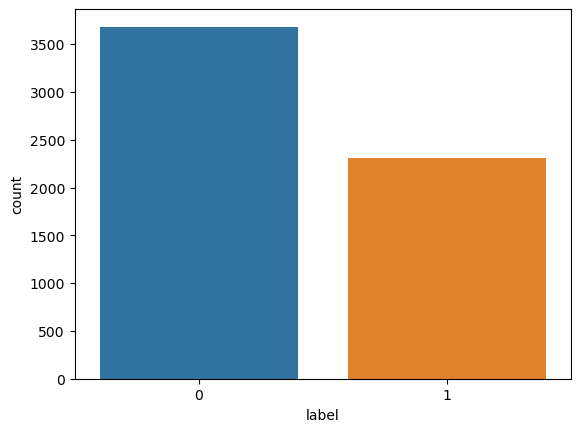

In [6]:
sn.countplot(data,x='label')

In [7]:
data.isnull().sum()

mean_freq            0
sd_freq              0
median_freq          0
q25_freq             0
q75_freq             0
iqr_freq             0
skewness             0
kurtosis_val         0
spectral_flatness    0
tempogram            0
mode_freq            0
centroid_freq        0
peak_freq            0
mean_fun             0
min_fun              0
max_fun              0
mean_dom             0
min_dom              0
max_dom              0
fund_freq            0
mod_index            0
label                0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler()

In [10]:
x = data.drop('label', axis=1)
y = data[['label']]


In [11]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [12]:
x.shape

(5993, 21)

In [13]:
y.shape

(5993, 1)

In [14]:

x.head(3)

,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,centroid_freq,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,1722.189076,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,2486.438634,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,1172.361957,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064


In [15]:
x ,y = random.fit_resample(x,y)

In [16]:
y.value_counts()

label
0        3682
1        3682
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,random_state=42 , test_size=.30)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix
lr = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier()

In [20]:
lr.fit(xtrain , ytrain)

LogisticRegression()

In [21]:
lr.score(xtrain , ytrain)

0.7530073729142414

In [22]:
lr.score(xtest , ytest)

0.7552036199095022

In [23]:
cm = confusion_matrix(ytest , lr.predict(xtest))
cm

array([[842, 276],
       [265, 827]], dtype=int64)

<Axes: >

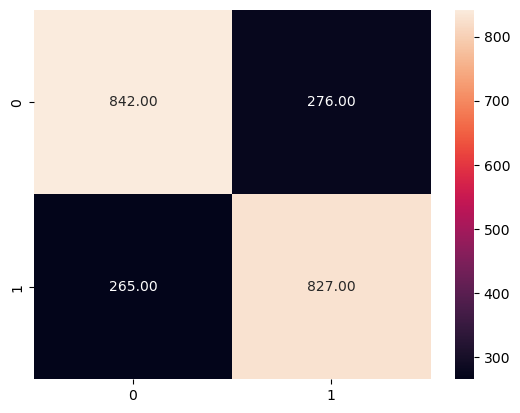

In [24]:
sn.heatmap(cm,annot = True , fmt=".2f")

In [25]:
print(classification_report(ytest,lr.predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1118
           1       0.75      0.76      0.75      1092

    accuracy                           0.76      2210
   macro avg       0.76      0.76      0.76      2210
weighted avg       0.76      0.76      0.76      2210



In [26]:
dtc.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [27]:
dtc.score(xtrain , ytrain)

1.0

In [28]:
dtc.score(xtest , ytest)

0.7918552036199095

In [29]:
print(classification_report(ytest,dtc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.83      0.75      0.78      1118
           1       0.76      0.84      0.80      1092

    accuracy                           0.79      2210
   macro avg       0.79      0.79      0.79      2210
weighted avg       0.79      0.79      0.79      2210



In [30]:
cm2 = confusion_matrix(ytest , dtc.predict(xtest))
cm2

array([[835, 283],
       [177, 915]], dtype=int64)

<Axes: >

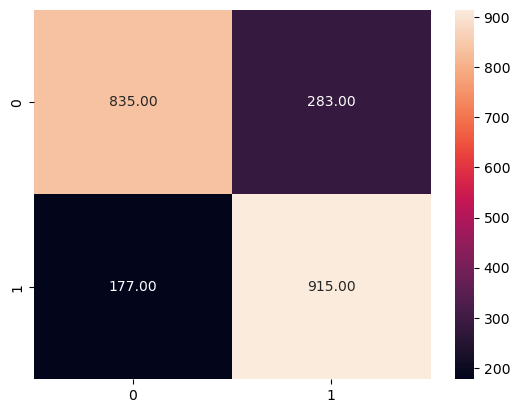

In [31]:
sn.heatmap(cm2,annot = True , fmt=".2f")

# cross validation 

In [32]:
from sklearn.model_selection import KFold, cross_val_score


In [33]:
kf=KFold(n_splits=10, shuffle=True)

In [34]:
result_dtc = cross_val_score(dtc,x , y, cv=kf) 

In [35]:
result_dtc

array([0.78968792, 0.80597015, 0.82632293, 0.8358209 , 0.80978261,
       0.79076087, 0.79619565, 0.81521739, 0.83016304, 0.78396739])

In [36]:
result_dtc.mean()

0.8083888856114683

In [37]:
result_lr = cross_val_score(lr,x , y, cv=kf) 

In [38]:
result_lr 

array([0.75983718, 0.75983718, 0.76933514, 0.74084125, 0.72418478,
       0.75951087, 0.7513587 , 0.72961957, 0.79483696, 0.7486413 ])

In [39]:
result_lr.mean()

0.75380029201817

In [40]:
from sklearn.model_selection import StratifiedKFold

In [41]:
st = StratifiedKFold(n_splits=10)

In [42]:
result2_dtc = cross_val_score(dtc, x, y, cv=st) 

In [43]:
result2_dtc.mean()

0.8195475193203942

In [44]:
result2_lr = cross_val_score(lr, x, y, cv=st) 

In [45]:
result2_lr.mean()

0.7536647911627632

In [46]:
st

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [47]:
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [48]:
import joblib as jb

In [52]:
import librosa
from scipy.stats import kurtosis
data_frame = pd.DataFrame(
    columns=['mean_freq', 'sd_freq', 'median_freq', 'q25_freq', 'q75_freq', 'iqr_freq', 'skewness', 'kurtosis_val',
             'spectral_flatness', 'tempogram', 'mode_freq', 'centroid_freq', 'peak_freq', 'mean_fun', 'min_fun',
             'max_fun', 'mean_dom', 'min_dom', 'max_dom', 'fund_freq', 'mod_index'])


    # Load the audio file
audio_file = 'male.wav'
y, sr = librosa.load(audio_file)

    # Calculate mean frequency using the provided function
fft_result = np.fft.fft(y)
fft_freq = np.fft.fftfreq(len(fft_result), 1 / sr)

    # Find the index of the frequency with the highest amplitude
max_freq_index = np.argmax(np.abs(fft_result))

    # Calculate mean frequency in KHz
mean_freq = np.abs(fft_freq[max_freq_index]) / 1000

    # Calculate other acoustic features
sd_freq = np.std(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
median_freq = np.median(librosa.feature.spectral_centroid(y=y, sr=sr)[0]) / 1000
q25_freq = np.percentile(librosa.feature.spectral_centroid(y=y, sr=sr)[0], 25) / 1000
q75_freq = np.percentile(librosa.feature.spectral_centroid(y=y, sr=sr)[0], 75) / 1000
iqr_freq = (q75_freq - q25_freq) / 1000
skewness = float(librosa.feature.spectral_bandwidth(y=y, sr=sr).std())
kurtosis_val = float(kurtosis(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])) / 1000

    # Calculate spectral flatness and extract a single scalar value
spectral_flatness = float(np.mean(librosa.feature.spectral_flatness(y=y)))

    # Calculate mode frequency using librosa.feature.tempogram
tempogram = librosa.feature.tempogram(y=y, sr=sr)
tempogram_mean = float(np.mean(tempogram)) / 1000

    # Calculate other features
mode_freq = float(np.argmax(tempogram_mean))
centroid_freq = float(librosa.feature.spectral_centroid(y=y, sr=sr)[0].mean())
peak_freq = float(librosa.feature.spectral_centroid(y=y, sr=sr)[0].argmax())

    # Additional features related to fundamental frequency
mean_fun = np.mean(librosa.feature.rms(y=y)) / 1000
min_fun = np.min(librosa.feature.rms(y=y)) / 1000
max_fun = np.max(librosa.feature.rms(y=y)) / 1000

    # Additional features related to dominant frequency
mean_dom = np.mean(tempogram)
min_dom = np.min(tempogram)
max_dom = np.max(tempogram)
dom_range = (max_dom - min_dom)

    # Modulation index
fund_freq = librosa.yin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
mod_index = np.sum(np.abs(np.diff(fund_freq))) / (fund_freq.max() - fund_freq.min())
        
    # Create a DataFrame to store the results
data_frame.loc[0] = [mean_freq, sd_freq, median_freq, q25_freq, q75_freq, iqr_freq, skewness, kurtosis_val,
                         spectral_flatness, tempogram_mean, mode_freq, centroid_freq, peak_freq, mean_fun, min_fun,
                         max_fun, mean_dom, min_dom, max_dom, fund_freq.mean(), mod_index]

In [53]:
data_frame

,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,centroid_freq,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,1722.189076,166.0,0.000019,5.288514e-13,0.000064,0.132647,-2.588721e-16,1.0,205.312043,15.314357


In [54]:
dtc.predict(data_frame)

array([0], dtype=int64)

In [55]:
import joblib as jb

In [56]:
jb.dump(dtc, 'test_num1111')

['test_num1111']